In [73]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
import datetime as dt
import seaborn as sbn
import sklearn as skl


### _Customer Information_
- **ID**: identificador exclusivo do cliente
- **Year_Birth**: Ano de nascimento do cliente
- **Education**: nível de educação do cliente
- **Marital_Status**: estado civil do cliente
- **Income**: Renda familiar anual do cliente
- **Kidhome**: Número de crianças na casa do cliente
- **Teenhome**: Número de adolescentes na casa do cliente
- **Dt_Customer**: Data do cadastro do cliente na empresa
- **Recency**: número de dias desde a última compra do cliente
- **Complain**: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário

### _Produtos_
#### qtd de produtos diferentes gastos nos ultimos dois anos 
- **MntWines**: Valor gasto em vinho nos últimos 2 anos
- **MntFruits**: Valor gasto em frutas nos últimos 2 anos
- **MntMeatProducts**: Valor gasto em carne nos últimos 2 anos
- **MntFishProducts**: Valor gasto em pescado nos últimos 2 anos
- **MntSweetProducts**: Valor gasto em doces nos últimos 2 anos
- **MntGoldProds**: Valor gasto em ouro nos últimos 2 anos

### _Promotion_
- **NumDealsPurchases**: Número de compras feitas com desconto
- **AcceptedCmp1**: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
- **AcceptedCmp2**: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
- **AcceptedCmp3**: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
- **AcceptedCmp4**: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
- **AcceptedCmp5**: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
- **Response**: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

### _Place_
- **NumWebPurchases**: Número de compras realizadas através do site da empresa
- **NumCatalogPurchases**: Número de compras feitas usando um catálogo
- **NumStorePurchases**: Número de compras feitas diretamente nas lojas
- **NumWebVisitsMonth**: Número de visitas ao site da empresa no último mês

In [124]:
data = pd.read_csv('C://Users//wesle//Documents//dados//marketing_campaign.csv', sep = ';')
data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13/06/2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Data Cleaning 

In [170]:
#Tratando valores nulos:
dt_clean = data.dropna()
print("número de dados e infos removidos depois da limpeza:", len(dt_clean))

número de dados e infos removidos depois da limpeza: 2216


In [171]:
dt_clean["Dt_Customer"] = pd.to_datetime(dt_clean["Dt_Customer"])
#list comprehensions
dates = [i.date()for i in dt_clean["Dt_Customer"]] # compressão de uma lista 
# registros do primeiro e o ultimo usuarios
print("Primeiro usuario registrado:",min(dates))
print("Ultimo usuario registrado:",max(dates))

Primeiro usuario registrado: 2012-01-08
Ultimo usuario registrado: 2014-12-06


<ipython-input-171-7fddc09f76d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_clean["Dt_Customer"] = pd.to_datetime(dt_clean["Dt_Customer"])


In [172]:
d1 = max(dates) #taking it to be the newest customer
days = [d1-i for i in dates]
dt_clean["customer_shops"] = days #numero de dias que o usuario começou a comprar na loja 
dt_clean["customer_shops"] = pd.to_numeric(dt_clean["customer_shops"], errors="coerce")

print("Categorias na coluna status civil:\n", dt_clean["Marital_Status"].value_counts(), "\n")
print("Categorias na coluna Grau de Instrução:\n", dt_clean["Education"].value_counts())

Categorias na coluna status civil:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64 

Categorias na coluna Grau de Instrução:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


<ipython-input-172-eb5e2b95a1fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_clean["customer_shops"] = days #numero de dias que o usuario começou a comprar na loja
<ipython-input-172-eb5e2b95a1fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_clean["customer_shops"] = pd.to_numeric(dt_clean["customer_shops"], errors="coerce")


In [173]:
#Feature Engineering

#Age of customer today
dt_clean["Age"] = [2022-i for i in dt_clean["Year_Birth"]]

#Total spendings on various items
dt_clean["Spent"] = dt_clean["MntWines"]+ dt_clean["MntFruits"]+ dt_clean["MntMeatProducts"]+ dt_clean["MntFishProducts"]+ dt_clean["MntSweetProducts"]+ dt_clean["MntGoldProds"]

#Deriving living situation by marital status"Alone"
dt_clean["Living_With"]=dt_clean["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
dt_clean["Children"] = dt_clean["Kidhome"] + dt_clean["Teenhome"]

#Feature for total members in the householde
dt_clean["Family_Size"] = dt_clean["Living_With"].replace({"Alone": 1, "Partner":2}) + dt_clean["Children"]

#Feature pertaining parenthood
dt_clean["Is_Parent"] = np.where(dt_clean.Children> 0, 1, 0)

#Segmenting education levels in three groups
dt_clean["Education"]=dt_clean["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# #For clarity
dt_clean = dt_clean.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

dt = dt_clean.drop(columns=["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1)

display(dt)

<ipython-input-173-803620d3092e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_clean["Age"] = [2022-i for i in dt_clean["Year_Birth"]]
<ipython-input-173-803620d3092e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_clean["Spent"] = dt_clean["MntWines"]+ dt_clean["MntFruits"]+ dt_clean["MntMeatProducts"]+ dt_clean["MntFishProducts"]+ dt_clean["MntSweetProducts"]+ dt_clean["MntGoldProds"]
<ipython-input-173-803620d3092e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,customer_shops,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,65,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,68,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,57,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,38,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,41,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,46742400000000000,55,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,5270400000000000,76,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,27216000000000000,41,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,27302400000000000,66,843,Partner,1,3,1


AttributeError: module 'matplotlib' has no attribute 'title'

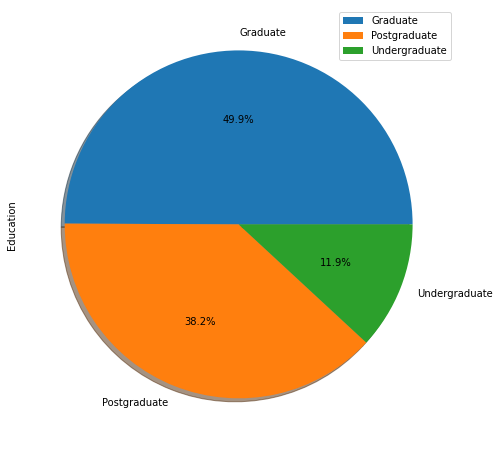

In [166]:
df = dt.loc[(dt['Living_With'] == 'Partner') && ()]

dt_customer = df.Education.value_counts().to_frame()

fig1 = dt_customer.plot.pie(y ='Education', autopct = '%0.01f%%', shadow=True, figsize=(10,8))
plt.title('Education X Living_With', size=20)
plt.show(fig1)

In [ ]:
#Dropping some of the redundant features
dt_clean = dt_clean.drop(columns=["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1)
dt_clean.describe()